# Projeto 01
## Multilayer Perceptron
### Grupo: 8
### Alunos:

-  SHERLON ALMEIDA DA SILVA	
-  GUILHERME MONTRONI
-  MARCUS VINICIUS LOBO COSTA
---

#**Importando as bibliotecas**

In [1]:
import numpy as np #Utilizado para realização de operações numéricas
import pandas as pd #Utilizado para vriar os dataframes para mostrar os gráficos (Heatmap)
import matplotlib.pyplot as plt #Utilizado para visualizar os gráficos (Heatmap)
import seaborn as sns #Utilizado para visualizar os gráficos (Heatmap)
import math #Utilizado para calcular o log2()

#**Multilayer Perceptron**

*   Passo a passo:
    1.   Calcula o somatório da multiplicação (Entrada x Pesos)
    2.   Calcula a função de ativação desses valores
    3.   Calcula o erro
    4.   Calcula a derivada da saída e a derivada da Camada Escondida
    5.   Calcula o Delta da saída e da Camada Escondida
    6.   Calcula o Gradiente

*   Obs.:
    *   O Delta da saída indica qual a melhor direção para fazer a atualização dos pesos.

    *   O gradiente é visto como uma forma geométrica 3D onde, por exemplo, colocamos uma bola e ela sofre a ação da gravidade caindo em direção aos pontos mínimos. O objetivo é encontrar o ponto mínimo global, que é o erro. Desta forma, o erro sendo zero, quer dizer que o ajuste dos pesos está ideal para o treinamento da rede.

    *   Calcula os pesos propagando a rede Feed Forward e no final retorna atualizando os pesos com Backpropagation.

##**Implementando o Multilayer Perceptron**

In [2]:
class Backpropagation:
    """Define alguns valores importantes na construcao do objeto"""
    def __init__(self, entradas, saidas, neuronios=3, taxaAprendizagem=0.05, epocas=1000, momento=1.0, numCamadas=1):
        self.entradas = entradas #Entradas possiveis
        self.saidas = saidas #Saidas esperadas
        self.neuronios = neuronios #Numero de neuronios na camada escondida
        self.taxaAprendizagem = taxaAprendizagem #Taxa de aprendizagem, velocidade de convergencia, o quao rapido o algoritmo vai aprender(Alto: corvergencia rapida, porem pode perder o minimo global. Baixo: Convergencia lenta, maior chance de encontrar o minimo global)
        self.epocas = epocas #Numero de iteracoes para treinamento
        self.momento = momento #Momentum, tenta evitar minimos locais, (Alto: corvergencia rapida. Baixo: Convergencia lenta, maior chance de sair do minimo local)
        self.numCamadas = numCamadas #Define o numero de camadas intermediarias (Camadas escondidas)
        self.pesos = []  #Pesos da (Entrada x Camada Escondida) + (Pesos internos das N camadas escondidas) + (Pesos da Camada Escondida x Saida)
        self.camadaSaida = []
        self.mediaAbsoluta = 0.0
        self.erro = []
        self.arquitetura_da_rede = {} #Salva o numero de neuronios por camada
        
    """Calcula o valor da funcao Sigmoide para o Somatorio ja calculado
    A funcao sigmoide retorna um valor real entre 0 e 1 (Grafico em formato de S)"""
    def sigmoid(self, soma):
        return 1 / (1 + np.exp(-soma))

    """Calcula a derivada - Da a direcao para qual lado do gradiente eh necessario atualizar o pesos"""
    def sigmoidDerivada(self, sig):
        return sig * (1 - sig)

    """Imprime arquitetura da rede"""
    def imprime_arquitetura(self):
      print("Arquitetura da rede:\n----Entrada: ", self.arquitetura_da_rede["in"], ", Camada escondida: ", self.arquitetura_da_rede["hidden"][0], "x", self.arquitetura_da_rede["hidden"][1], ", Saida: ", self.arquitetura_da_rede["out"])

    """Gera os pesos aleatoriamente"""
    def inicializaPesos(self):
        Nin     = len(self.entradas[0])
        Nhidden = self.neuronios
        Nout    = len(self.saidas[0])

        #Inicializando os pesos: (Entrada x Camada Escondida) + (N Camadas intermediárias) + (Camada Escondida x Saida)
        for i in range(self.numCamadas+1):
            if i == 0: #Entrada X Camada Escondida
              self.pesos.append(2*np.random.random((Nin,Nhidden)) - 1)
            elif i == self.numCamadas: #Camada Escondida x Saida
              self.pesos.append(2*np.random.random((Nhidden,Nout)) - 1)
            else: #N Camadas intermediárias
              self.pesos.append(2*np.random.random((Nhidden,Nhidden)) - 1)
        
        #Salva a arquitetura da rede
        self.arquitetura_da_rede["in"] = Nin
        self.arquitetura_da_rede["hidden"] = [self.numCamadas, Nhidden]
        self.arquitetura_da_rede["out"] = Nout
        
    """Repete os calculos "epocas" iteracoes para que a rede adapte os pesos (Aprenda)"""
    def treinamento(self):
        for j in range(self.epocas):
            ############################# FEED FORWARD ####################################
            camadas = []
            camadaAtual = self.entradas #Começa partindo da camada de entrada: Copia a entrada para a variavel camadaAtual
            camadas.append(camadaAtual) #Já adiciona a primeira camada (Entrada)
            """Calcula o somatorio e obtem o valor da Funcao de Ativacao"""
            for i in range(self.numCamadas+1):
              camada = camadaAtual #Copia o conteudo da camada atual para a variavel camada
              somaSinapse = np.dot(camada, self.pesos[i]) #Faz a multiplicacao e soma das camadas pelos pesos
              camadaPosterior = self.sigmoid(somaSinapse) #Com os valores do somatorio obtem-se o valor correspondente da funcao de ativacao sigmoide
              camadaAtual = camadaPosterior #Passa para a próxima camada
              camadas.append(camadaAtual) #Armazena os valores das camadas para poder realizar a atualização com o Backpropagation posteriormente
            #Ao fim do loop acima a variavel camadaAtual corresponderá à camada de saída da rede (self.camadaSaida)
            self.camadaSaida = camadaAtual
            
            ############################# CALCULANDO O ERRO ####################################
            """Calcula o erro (Saida Esperada - Saida) e a Media Absoluta dos erros"""
            erroCamadaSaida = self.saidas - self.camadaSaida #Calcula os erros
            self.mediaAbsoluta = np.mean(np.abs(erroCamadaSaida)) #Calcula a media desses erros
            #Obs.: a media eh usada para que possa ser reduzida e se aproximar cada vez mais de 0, pois entao o erro seria 0 e a resposta seria a mais proxima
            #Obs.: a porcentagem de acerto eh (1 - media absoluta), por exemplo, (1 - 0.49) = 51%
            #print("Erro: " + str(self.mediaAbsoluta))
            self.erro.append(self.mediaAbsoluta)
            
            """Realiza os calculos da Derivada e do Delta da Saida"""
            derivadaSaida = self.sigmoidDerivada(self.camadaSaida)
            deltaSaida = erroCamadaSaida * derivadaSaida
            
            """Realiza os calculos do Delta da camada Escondida"""
            deltas = []
            deltaCamada = deltaSaida #Inicializa o deltaCamada como sendo o delta da saida
            deltas.append(deltaCamada) #Já adiciona a primeira camada (Entrada)
            """Realiza os calculos do Delta das camadas Escondidas"""
            for i in range(self.numCamadas, 0, -1):
              pesosTransposta = self.pesos[i].T #Faz a matriz transposta para obedecer as regras de multiplicacao de matrizes MxN x NxO, onde N deve ser igual para gerar MxO 
              deltaCamadaXPeso = deltaCamada.dot(pesosTransposta) #Calcula o peso (Delta Camada x Peso)
              deltaCamadaAnterior = deltaCamadaXPeso * self.sigmoidDerivada(camadas[i]) #Calcula o delta da camada Anterior
              deltaCamada = deltaCamadaAnterior
              deltas.append(deltaCamada) #Armazena os valores dos deltas para poder realizar a atualização dos pesos
            #Ao fim do loop acima a variavel deltaCamada corresponderá à camada de entrada da rede

            ############################# BACK PROPAGATION ####################################
            """Faz a atualizacao dos pesos com o Backpropagation"""
            for i in range(self.numCamadas+1, 0, -1):
              camadaTransposta = camadas[i-1].T
              pesosNovos = camadaTransposta.dot(deltas[self.numCamadas+1-i])
              self.pesos[i-1] = (self.pesos[i-1] * self.momento) + (pesosNovos * self.taxaAprendizagem)
        
    """Dados os pesos calculados no treinamento + uma entrada, retorna o resultado (Prediction)"""
    def propaga(self,entrada):
        camadas = []
        camadaAtual = entrada #Começa partindo da camada de entrada: Copia a entrada para a variavel camadaAtual
        camadas.append(camadaAtual) #Já adiciona a primeira camada (Entrada)
        """Calcula o somatorio e obtem o valor da Funcao de Ativacao"""
        for i in range(self.numCamadas+1):
          camada = camadaAtual #Copia o conteudo da camada atual para a variavel camada
          somaSinapse = np.dot(camada, self.pesos[i]) #Faz a multiplicacao e soma das camadas pelos pesos
          camadaPosterior = self.sigmoid(somaSinapse) #Com os valores do somatorio obtem-se o valor correspondente da funcao de ativacao sigmoide
          camadaAtual = camadaPosterior #Passa para a próxima camada
          camadas.append(camadaAtual) #Armazena os valores das camadas para poder realizar a atualização com o Backpropagation posteriormente
        #Ao fim do loop acima a variavel camadaAtual corresponderá à camada de saída da rede (self.camadaSaida)
        self.camadaSaida = camadaAtual

        return self.camadaSaida
    
    #Mostrando o erro ao longo do treinamento
    def visualizaErro(self, nome_do_arquivo):
        plt.figure(figsize=(6,4))
        _x = [i for i in range(len(self.erro))]
        _y = [i for i in (self.erro)]
        plt.plot(_x, _y)
        plt.title("Convergencia do erro - Treinamento")
        plt.ylabel('Erro')
        plt.xlabel('Epocas')
        plt.savefig(nome_do_arquivo, dpi=300) #Exporta a figura com qualidade
        plt.show()

##**Problema de Classificação:** Dataset Wine




### **Carregamento e exploração do Dataset**

In [3]:
from sklearn.datasets import load_wine #Utilizado para carregar o dataset wine pedido pelo projeto
from sklearn.model_selection import train_test_split #Utilizado para dividir a base de dados em treinamento e teste

In [4]:
#Carregando os dados para a variável base
base = load_wine()

In [5]:
#Apresenta os diretórios da base wine
dir(base)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [6]:
#Apresenta toda a descrição da base wine
print(base.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [7]:
base.feature_names #Apresenta características dos tipos de vinhos/wines

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
X = pd.DataFrame(base.data) #Carregando valores de entrada para a rede
y = pd.DataFrame(base.target) #Carregando valores de saidas desejados para a rede

In [9]:
X.shape #Apresentando o a quantidade de entradas (instâncias e número de atributos)

(178, 13)

In [10]:
y.shape #Apresentando a quantidade de saídas 

(178, 1)

In [11]:
#Apresentando o a quantidade de entradas (instâncias e número de atributos)
X.columns = base.feature_names
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


###**Visualizando os Dados com Técnicas de Projeção Multidimensional**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

seed = 0 #Semente de entrada para execucao das Tecnicas de Projecao Multidimensional
X_normalized = StandardScaler().fit(X).transform(X)
info = pairwise_distances(X_normalized, Y=None, metric='euclidean') #Distance Matrix

matrix_2d_tsne = TSNE(n_components=2, random_state=seed).fit_transform(info)
proj_tsne = pd.DataFrame(matrix_2d_tsne)
proj_tsne.columns = ["x", "y"]
proj_tsne["Category"] = base.target_names[y]

matrix_2d_mds = MDS(n_components=2, metric=True, max_iter=3000, eps=1e-12, n_init=1, dissimilarity='precomputed', random_state=seed).fit_transform(info)
proj_mds = pd.DataFrame(matrix_2d_mds)
proj_mds.columns = ["x", "y"]
proj_mds["Category"] = base.target_names[y]

matrix_2d_pca = PCA(n_components=2, random_state=seed).fit_transform(info)
proj_pca = pd.DataFrame(matrix_2d_pca)
proj_pca.columns = ["x", "y"]
proj_pca["Category"] = base.target_names[y]

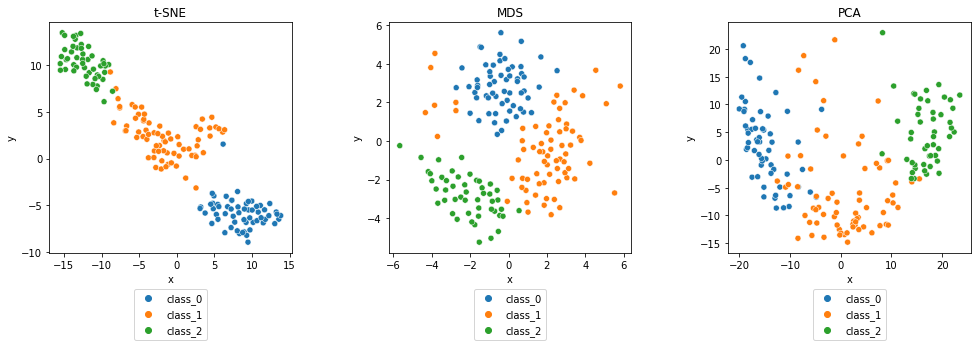

In [13]:
#Definindo o tamanho das figuras
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(
    left   = 0.1,   # the left side of the subplots of the figure
    right  = 0.9,   # the right side of the subplots of the figure
    bottom = 0.1,   # the bottom of the subplots of the figure
    top    = 0.9,   # the top of the subplots of the figure
    wspace = 0.4,   # the amount of width reserved for blank space between subplots
    hspace = 0.6    # the amount of height reserved for white space between subplots
)

technique = ["t-SNE", "MDS", "PCA"]
opt = [proj_tsne, proj_mds, proj_pca]
c=0
for i in opt:
    proj_data = i
    sns.scatterplot(data=proj_data, x="x", y="y", hue="Category", ax=axs[c])
    axs[c].legend(loc="lower center", bbox_to_anchor=(0.5, -0.40))
    axs[c].set_title(technique[c])
    c+=1

fig.savefig('projecao_multidimensional.png', dpi=300) #Exporta a figura com qualidade

###**Padronizando os dados**

In [14]:
#Referencia: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler #Normalizar dados
from sklearn import preprocessing

X = X.to_numpy()
y = y.to_numpy()

In [15]:
#Normalizando os dados de entrada ENTRADA em um intervalo [0, 1]
min=0; max=1;
X_norm = MinMaxScaler(feature_range=(min, max)).fit(X).transform(X)

#Transformando a SAÍDA para problemas multiclasse
#  Frequentemente utilizado em problemas de classificação multiclasse, o
#  OneHotEncoder transforma a saída esperada em um vetor N dimensional,
#  representado por N neurônios na camada de saída. O neurônio com maior
#  probabilidade (Softmax) é o resultado para a classe predita.
encoder = preprocessing.OneHotEncoder() # Encoder
encoder.fit(y) # Ajustando o encoder
y_scaled = encoder.transform(y).toarray() # Transformando os dados do encoder

In [16]:
pd.DataFrame(X_norm, columns=base.feature_names) #Mostrando dados normalizados

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [17]:
pd.DataFrame(y_scaled) #Mostrando dados após o OneHotEncoder

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
173,0.0,0.0,1.0
174,0.0,0.0,1.0
175,0.0,0.0,1.0
176,0.0,0.0,1.0


###**Executando Rede Neural:** Classificação

In [18]:
#Referência: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
from sklearn import model_selection # Módulo de preprocessamento do Sklearn

#Referência: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
from sklearn.metrics import accuracy_score #Medir a acurácia da classificação

#Referência: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html
from scipy.special import softmax #Distribuição de probabilidades Softmax para identificação da classe predita

####**Teste inicial:** usando train-test split

#####**Executando NOSSA implementação do Classificador MLP**

In [19]:
"""Versão usando o Train-Test Split"""
inputs = X_norm
targets = y_scaled

# Semente para os passos que usam funções pseudo aleatórias
# Isso previne que todas as vezes gere algo diferente
seed = 42

# Tamanho dos datasets
test_size = 0.2 # 20%

# Divisão dos datasets em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, targets, test_size=test_size, random_state=seed)

print("Tamanho dos datasets: Treino = " + str((1-test_size)*100) + ", Teste = " + str(test_size*100))
print("---- X_train = " + str(X_train.shape) + ", X_test = " + str(X_test.shape) + ", y_train = " + str(y_train.shape) + ", y_test = " + str(y_test.shape))

# Fitting
rede = Backpropagation(X_train, y_train, neuronios=3, numCamadas=2)
rede.inicializaPesos()
rede.treinamento()
rede.imprime_arquitetura()

#Prediction
y_pred = rede.propaga(X_test)
#Utilizando a distribuição de probabilidades Softmax para identificação da classe predita dentre os neurônios da camada de saída
y_pred = np.argmax(softmax(y_pred), axis=1)
# Transformação inversa (dados codificados para dados não codificados)
y_test = encoder.inverse_transform(y_test)

score = accuracy_score(y_test, y_pred)*100
print("----Score do classificador: %.2f" % (score))

Tamanho dos datasets: Treino = 80.0, Teste = 20.0
---- X_train = (142, 13), X_test = (36, 13), y_train = (142, 3), y_test = (36, 3)
Arquitetura da rede:
----Entrada:  13 , Camada escondida:  2 x 3 , Saida:  3
----Score do classificador: 100.00


In [20]:
rede.pesos

[array([[ 0.91315606, -2.11595514,  0.22552996],
        [-0.37923405, -1.29875162,  0.77434521],
        [ 1.36111045, -4.18421463,  0.76025423],
        [-1.43705902,  2.86173893,  1.72088834],
        [-0.05897757,  1.07751865,  0.2932986 ],
        [-0.85427108,  0.88955266, -0.13213599],
        [ 0.94852426, -0.23292305, -3.73595713],
        [-0.57744992,  1.35210549, -0.44265793],
        [ 0.00922441,  1.68525966, -1.90629164],
        [-0.85094289, -3.5485616 ,  2.67445196],
        [-0.85283571,  3.65025529, -1.78329289],
        [ 1.13368223, -0.2564598 , -3.38723166],
        [ 2.6961178 , -3.88783088, -0.58846266]]),
 array([[-1.82233248,  2.65979114, -3.74349796],
        [ 8.35741564, -7.46491796, -0.0393127 ],
        [-3.40908891, -2.80451479,  5.91047129]]),
 array([[-4.51801884,  6.82203981, -7.11204448],
        [ 6.42784663, -7.48682439, -2.65779429],
        [-6.49573519, -3.01309801,  5.55417044]])]

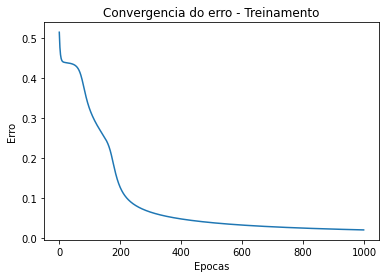

In [21]:
rede.visualizaErro("erro_classificacao.png") #Apresenta a convergência do erro

#####**Executando implementação do Classificador MLP do SCIKIT LEARN para COMPARAÇÃO com a NOSSA implementação**

In [22]:
#Referência: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier

inputs = X_norm
targets = y_scaled

# Semente para os passos que usam funções pseudo aleatórias
# Isso previne que todas as vezes gere algo diferente
seed = 42

# Tamanho dos datasets
test_size = 0.2 # 20%

# Divisão dos datasets em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, targets, test_size=test_size, random_state=seed)

print("Tamanho dos datasets: Treino = " + str((1-test_size)*100) + ", Teste = " + str(test_size*100))
print("---- X_train = " + str(X_train.shape) + ", X_test = " + str(X_test.shape) + ", y_train = " + str(y_train.shape) + ", y_test = " + str(y_test.shape))

# Fitting
clf = MLPClassifier(random_state=seed, max_iter=1000).fit(X_train, y_train)

#Prediction
y_pred = clf.predict(X_test)

score = accuracy_score(y_test, y_pred)*100
print("----Score do classificador: %.2f" % (score))

Tamanho dos datasets: Treino = 80.0, Teste = 20.0
---- X_train = (142, 13), X_test = (36, 13), y_train = (142, 3), y_test = (36, 3)
----Score do classificador: 100.00


####**Teste de Final:** usando K-Fold e as variações de parâmetros solicitadas

In [23]:
"""Esta função automatiza a execução do modelo para facilitar o script de variação de parâmetros solicitados no enunciado do Projeto 1"""
def executar_classificador(inputs, targets, k=10, n=3, tx=0.05, ep=1000, m=1.0, nC=1):
  #Armazena os resultados para fazer a média
  scores = []

  # Número de divisões (k)
  n_splits = k

  # Inicializando o módulo KFold
  kfold = model_selection.KFold(n_splits=n_splits)

  # Pré-computando o número de divisões
  kfold.get_n_splits(inputs)

  for i, (train_index, test_index) in enumerate(kfold.split(inputs)):
    #print("\nKfold split (%d de %d)" % (i+1, n_splits))

    # Selecionando os dados de acordo com os índices do split
    X_train, X_test = inputs[train_index], inputs[test_index]
    y_train, y_test = targets[train_index], targets[test_index]

    test_size = (len(X_test)/(len(X_train)+len(X_test)))
    #print("Tamanho dos datasets: Treino = " + str(round((1-test_size)*100, 2)) + ", Teste = " + str(round(test_size*100, 2)))
    #print("---- X_train = " + str(X_train.shape) + ", X_test = " + str(X_test.shape) + ", y_train = " + str(y_train.shape) + ", y_test = " + str(y_test.shape))

    # Fitting
    rede = Backpropagation(X_train, y_train, n, tx, ep, m, nC) #parametros(entradas, saidas, neuronios, taxaAprendizagem, epocas, momento, numCamadas)
    rede.inicializaPesos()
    rede.treinamento()

    #Prediction
    y_pred = rede.propaga(X_test)
    #Utilizando a distribuição de probabilidades Softmax para identificação da classe predita dentre os neurônios da camada de saída
    y_pred = np.argmax(softmax(y_pred), axis=1)
    # Transformação inversa (dados codificados para dados não codificados)
    y_test = encoder.inverse_transform(y_test)

    score = accuracy_score(y_test, y_pred)*100
    #print("----Score do classificador: %.2f" % (score))
    scores.append(score)

  avg_score = np.mean(scores)
  #print("\nScore médio do classificador: %.2f" % (avg_score))

  print("K-fold: %d, Treino: %.2f, Teste: %.2f, neuronios: %d, taxaAprend: %.2f, epocas: %d, momento: %.2f, camadasOcultas:%d, Score médio: %.2f" % (n_splits, (1-test_size)*100, test_size*100, n, tx, ep, m, nC, avg_score))

In [24]:
"""Atribuindo os dados normalizados às variáveis a serem manipuladas pela MLP"""
inputs = X_norm
targets = y_scaled

#####**Variando percentual de Treinamento e Teste com K-Fold**

In [25]:
#Definindo os K splits a serem testados
splits = [3, 5, 10]

#Variando o tamanho do conjunto de treinamento e teste usando K-Fold
for k in splits:
  executar_classificador(inputs, targets, k, 3, 0.05, 1000, 1.0, 1)

K-fold: 3, Treino: 66.85, Teste: 33.15, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 25.41
K-fold: 5, Treino: 80.34, Teste: 19.66, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 73.27
K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 93.33


#####**Variando o número de camada escondida**

In [26]:
#Definindo o numero de camadas escondidas
camadas_escondidas = [1, 2]
#Variando o numero de camadas escondidas
for nC in camadas_escondidas:
  executar_classificador(inputs, targets, 10, 3, 0.05, 1000, 1.0, nC)

K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 94.44
K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:2, Score médio: 95.56


#####**Variando o número de neurônios na(s) camada(s) escondida(s)**

In [27]:
#Definindo o numero de neuronios na camada escondida
neuronios = [3, 5, 10]
#Variando o numero de neuronios na camada escondida
for n in neuronios:
  executar_classificador(inputs, targets, 10, n, 0.05, 1000, 1.0, 1)


K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 94.44
K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 5, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 95.00
K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 10, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 97.78


#####**Variando a taxa de aprendizagem**

In [28]:
#Definindo a variacao da taxa de aprendizagem
taxaAprendizagem = [0.01, 0.05, 0.1]
#Variando a taxa de aprendizagem
for tx in taxaAprendizagem:
  executar_classificador(inputs, targets, 10, 3, tx, 1000, 1.0, 1)

K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.01, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 93.89
K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 93.33
K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.10, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 93.33


#####**Variando o número de épocas**

In [29]:
#Definindo o numero de epocas
epocas = [200, 500, 1000]
#Variando a quantidade de epocas
for ep in epocas:
  executar_classificador(inputs, targets, 10, 3, 0.05, ep, 1.0, 1)

K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 200, momento: 1.00, camadasOcultas:1, Score médio: 93.89
K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 500, momento: 1.00, camadasOcultas:1, Score médio: 82.78
K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 93.33


#####**Variando o termo momento**

In [30]:
#Definindo a variação do momento
momentos = [0.25, 0.5, 1.0]
#Variando o momento
for m in momentos:
  executar_classificador(inputs, targets, 10, 3, 0.05, 1000, m, 1)

K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 0.25, camadasOcultas:1, Score médio: 9.44
K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 0.50, camadasOcultas:1, Score médio: 9.44
K-fold: 10, Treino: 90.45, Teste: 9.55, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Score médio: 95.00


##**Problema de Regressão Multivariada:** Dataset Geographical Original of Music

### **Carregamento e exploração do Dataset**

In [31]:
#Carregando os dados para a variável base
base = pd.read_csv("default_features_1059_tracks.txt", sep=",", header=None)
base

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,-0.105672,1.728885,1.788986,0.849798,-1.109353,0.537904,-0.115368,5.069512,6.007710,0.820869,0.896190,0.131699,0.859286,2.059065,0.266773,1.192932,-1.421091,2.128661,-1.288109,1.458738,-0.734508,-0.092678,-0.571314,-0.142634,2.748619,3.099077,0.317270,-0.130580,2.048282,-0.173489,0.324616,-0.300817,0.471089,-0.538577,-0.979124,-0.679165,0.135963,-1.094049,-0.072197,-0.752002,-0.660715,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,0.389178,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.399577,0.310805,-0.039326,-0.111546,0.304586,-0.943453,0.114960,-0.335898,0.826753,-0.393786,-0.594327,-0.399561,-0.902700,-0.962526,0.755288,1.532248,1.817804,0.703930,0.533387,0.163344,-0.331143,0.435447,

In [32]:
#Listando informações sobre a base de dados
base.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,-0.019312,-0.021095,-0.029824,-0.041360,0.025364,0.003521,-0.021183,0.010021,-0.030965,-0.017495,-0.009739,-0.020584,-0.013177,-0.002876,0.005850,-0.011547,0.001516,-0.045074,-0.045770,-0.035677,-0.021926,-0.043428,-0.040145,-0.034628,-0.013943,-0.001377,-0.002940,-0.001075,0.002536,-0.007396,0.007006,0.005717,0.003479,0.002798,-0.061920,-0.056427,-0.021419,-0.017463,-0.008009,-0.016269,-0.012978,0.016907,0.021348,0.030613,0.018534,0.029566,0.026912,0.024524,0.029523,0.032002,0.024929,-0.066779,-0.068595,-0.016383,0.014558,0.006122,-0.012147,-0.003469,0.018174,0.024829,0.025828,0.019925,0.025629,0.021065,0.027439,0.019795,0.023401,0.022533,26.651294,38.405656
std,0.987911,0.986098,0.972813,0.984577,0.999363,1.000305,0.989127,1.007714,1.007447,1.017138,1.021861,1.019824,1.014239,1.009824,1.013566,1.008664,1.004706,0.974172,0.976912,0.978907,0.976634,0.971008,0.976537,0.985923,0.997837,1.005007,1.005078,1.007265,1.003287,1.001275,1.007848,0.994987,1.010523,1.006530,0.906946,0.952494,0.996328,1.005125,1.001176,0.973540,0.982350,1.014465,1.012536,1.013680,1.016112,1.010212,1.012962,1.008261,1.014314,1.013144,1.014117,0.947516,0.960038,0.993703,0.943230,1.023406,0.996403,0.986890,1.006145,1.018136,1.012146,1.009817,1.008802,1.000416,1.000374,1.003078,1.011060,1.007017,18.459432,50.419790
min,-1.529463,-1.476560,-1.133667,-3.222673,-3.386389,-4.366687,-4.291933,-5.287408,-5.281537,-6.856486,-5.689593,-5.088504,-4.009762,-5.703061,-4.168885,-4.237721,-5.465138,-1.297096,-1.354721,-1.107845,-1.572617,-2.046784,-2.496498,-2.449430,-3.092878,-3.200774,-2.872163,-3.242499,-3.213401,-3.068453,-2.589081,-2.516073,-2.511380,-2.430633,-0.983999,-1.413520,-1.935214,-1.602092,-1.894283,-1.856495,-1.572034,-1.545811,-1.557714,-1.441019,-1.400707,-1.621208,-1.461471,-1.259752,-1.311200,-1.376280,-1.375666,-1.023177,-1.789864,-2.678254,-2.462872,-2.535428,-2.208065,-1.702372,-1.466944,-1.665115,-1.597512,-1.579654,-1.614369,-1.505952,-1.404766,-1.248702,-1.221595,-1.329595,-35.300000,-88.760000
25%,-0.607617,-0.621808,-0.599230,-0.640634,-0.599677,-0.633760,-0.608229,-0.556419,-0.513522,-0.464189,-0.534840,-0.453784,-0.544439,-0.544919,-0.533688,-0.516786,-0.543627,-0.629327,-0.563929,-0.732387,-0.681518,-0.721838,-0.765705,-0.742398,-0.646702,-0.631441,-0.625023,-0.575735,-0.593027,-0.609992,-0.606038,-0.604720,-0.604341,-0.610660,-0.602015,-0.877019,-0.716862,-0.727199,-0.710840,-0.661131,-0.776895,-0.712455,-0.683085,-0.636806,-0.657618,-0.654947,-0.645605,-0.627822,-0.624203,-0.649471,-0.650942,-0.684348,-0.692259,-0.612971,-0.295026,-0.671277,-0.721614,-0.733218,-0.711677,-0.727110,-0.668874,-0.680484,-0.692833,-0.660134,-0.693410,-0.652468,-0.641316,-0.658826,14.660000,3.210000
50%,-0.184135,-0.211257,-0.301310,-0.134986,0.157396,0.011760,0.037887,0.042447,0.074414,0.091507,0.056207,0.057090,0.073686,0.020632,-0.015914,0.021738,-0.022450,-0.270821,-0.225648,-0.440704,-0.223869,-0.098526,-0.158790,-0.182673,-0

In [33]:
#Separando as entradas
X = base.iloc[:, :-2] #Carregando valores de entrada para a rede
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,-0.105672,1.728885,1.788986,0.849798,-1.109353,0.537904,-0.115368,5.069512,6.007710,0.820869,0.896190,0.131699,0.859286,2.059065,0.266773,1.192932,-1.421091,2.128661,-1.288109,1.458738,-0.734508,-0.092678,-0.571314,-0.142634,2.748619,3.099077,0.317270,-0.130580,2.048282,-0.173489,0.324616,-0.300817,0.471089,-0.538577,-0.979124,-0.679165,0.135963,-1.094049,-0.072197,-0.752002,-0.660715,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,0.389178,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.399577,0.310805,-0.039326,-0.111546,0.304586,-0.943453,0.114960,-0.335898,0.826753,-0.393786,-0.594327,-0.399561,-0.902700,-0.962526,0.755288,1.532248,1.817804,0.703930,0.533387,0.163344,-0.331143,0.435447,-0.084010,0.336186,0.144317,0.318932,0.634556,1.745209,1.441760,2.056277,1.1

In [34]:
#Separando as saídas
y = base.iloc[:,-2:] #Carregando valores de saidas desejados para a rede
y

,68,69
0,-15.75,-47.95
1,14.91,-23.51
2,12.65,-8.00
3,9.03,38.74
4,34.03,-6.85
...,...,...
1054,-6.17,35.74
1055,11.55,104.91
1056,41.33,19.80
1057,54.68,25.31


###**Padronizando os dados**

In [35]:
X = X.to_numpy()
y = y.to_numpy()

In [36]:
#Normalizando os dados de entrada ENTRADA em um intervalo [0, 1]
min=0; max=1;
X_norm = MinMaxScaler(feature_range=(min, max)).fit(X).transform(X)

In [37]:
pd.DataFrame(X_norm) #Mostrando dados normalizados

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,0.792304,0.763528,0.554789,0.459774,0.332975,0.312870,0.694223,0.485061,0.772537,0.621409,0.481299,0.738453,0.725402,0.514536,0.295705,0.475834,0.523710,0.616000,0.665243,0.409854,0.270954,0.349673,0.429808,0.530321,0.431607,0.593379,0.153179,0.561628,0.186365,0.525931,0.247875,0.338569,0.252243,0.292883,0.521252,0.750038,0.365461,0.154609,0.667747,0.187980,0.270443,0.174228,0.279228,0.101454,0.052115,0.133363,0.161850,0.017567,0.193839,0.073436,0.086271,0.376478,0.443205,0.312186,0.103269,0.246295,0.374460,0.314284,0.080394,0.252689,0.010367,0.279176,0.059900,0.180836,0.046037,0.075438,0.046425,0.067519
1,0.160018,0.113349,0.072690,0.406624,0.751846,0.641129,0.601004,0.522885,0.619012,0.653455,0.492916,0.595300,0.497301,0.447762,0.249471,0.408811,0.601479,0.209460,0.172032,0.159519,0.109110,0.375660,0.272362,0.245727,0.385994,0.339831,0.258780,0.366548,0.318274,0.388760,0.408675,0.488291,0.402824,0.408472,0.332936,0.391774,0.248680,0.174454,0.283238,0.173572,0.147163,0.241493,0.127112,0.133569,0.118607,0.180963,0.211788,0.156112,0.199162,0.110103,0.147045,0.425894,0.580667,0.416186,0.150607,0.402454,0.223877,0.157679,0.213051,0.111763,0.122493,0.161148,0.146472,0.183240,0.260799,0.304061,0.166138,0.372358
2,0.076301,0.078613,0.047402,0.484945,0.437505,0.722346,0.670107,0.545760,0.474494,0.498113,0.412497,0.465459,0.293013,0.421583,0.388258,0.542881,0.637309,0.060435,0.080564,0.076591,0.180273,0.377541,0.390391,0.205120,0.358638,0.382937,0.309758,0.377377,0.395276,0.528777,0.428116,0.570605,0.553237,0.488886,0.040445,0.187444,0.266644,0.139446,0.261333,0.256409,0.129577,0.224292,0.324745,0.198703,0.244808,0.369894,0.311422,0.183588,0.371023,0.287861,0.215229,0.059315,0.315691,0.404767,0.135564,0.370122,0.321525,0.075690,0.102961,0.172823,0.106767,0.249681,0.184261,0.573916,0.347254,0.433194,0.393006,0.327565
3,0.072377,0.064981,0.437753,0.430514,0.595593,0.712046,0.825708,0.641975,0.647266,0.667595,0.492529,0.597673,0.573666,0.479248,0.453135,0.473004,0.662567,0.120086,0.122585,0.714612,0.209043,0.320204,0.367972,0.425670,0.303144,0.523085,0.406622,0.379895,0.260750,0.277976,0.385206,0.400388,0.318869,0.244423,0.368989,0.443405,0.725329,0.224833,0.353056,0.189923,0.325071,0.066145,0.155366,0.087412,0.135554,0.200691,0.127712,0.262045,0.391883,0.233646,0.130261,0.534277,0.666357,0.746799,0.150453,0.362161,0.450945,0.374267,0.101781,0.285450,0.157779,0.218983,0.089514,0.065927,0.095425,0.112365,0.182974,0.128292
4,0.191425,0.143468,0.117185,0.361344,0.782781,0.481490,0.574164,0.580605,0.477661,0.773414,0.465605,0.748825,0.393793,0.429800,0.309501,0.450015,0.540901,0.128949,0.118368,0.082792,0.092144,0.146065,0.152993,0.251397,0.311062,0.354031,0.221687,0.300179,0.264219,0.364423,0.437297,0.472669,0.426565,0.468170,0.215326,0.264125,0.261312,0.158938,0.289226,0.160971,0.380175,0.258029,0.148433,0.188917,0.125116,0.227614,0.200465,0.146336,0.254738,0.195663,0.239282,0.322555,0.317965,0.339628,0.157080,0.312597,0.146787,0.247873,0.198040,0.181444,0.075383,0.131821,0.079867,0.178716,0.249995,0.178020,0.225971,0.358486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.175863,0.146555,0.150084,0.340031,0.651354,0.471280,0.628473,0.588422,0.661773,0.624483,0.439180,0.507902,0.388682,0.372231,0.475923,0.574909,0.712956,0.193609,0.170603,0.270129,0.136253,0.398428,0.308991,0.327664,0.415875,0.475344,0.370180,0.521533,0.450611,0.595348,0.495052,0.820208,0.706370,0.701098,0.127268,0.278697,0.332217,0.031063,0.286370,0.250712,0.324887,0.147807,0.200747,0.272482,0.146009,0.215812,0.224498,0.143878,0.497557,0.374715,0.44

In [38]:
#Normalizando os dados de entrada SAÍDA em um intervalo [0, 1]
min=0; max=1;
y_norm = MinMaxScaler(feature_range=(min, max)).fit(y).transform(y)

In [39]:
pd.DataFrame(y_norm) #Mostrando dados normalizados

,0,1
0,0.217271,0.171557
1,0.558013,0.274298
2,0.532896,0.339499
3,0.492665,0.535985
4,0.770505,0.344333
...,...,...
1054,0.323739,0.523373
1055,0.520671,0.814150
1056,0.851634,0.456365
1057,1.000000,0.479527


###**Executando Rede Neural:** Regressão

In [40]:
#Referência: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
from sklearn.metrics import mean_squared_error

####**Teste inicial:** usando train-test split

#####**Executando NOSSA implementação do Regressor MLP**

In [41]:
"""Versão usando o Train-Test Split"""
inputs = X_norm
targets = y_norm

# Semente para os passos que usam funções pseudo aleatórias
# Isso previne que todas as vezes gere algo diferente
seed = 42

# Tamanho dos datasets
test_size = 0.2 # 20%

# Divisão dos datasets em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, targets, test_size=test_size, random_state=seed)

print("Tamanho dos datasets: Treino = " + str((1-test_size)*100) + ", Teste = " + str(test_size*100))
print("---- X_train = " + str(X_train.shape) + ", X_test = " + str(X_test.shape) + ", y_train = " + str(y_train.shape) + ", y_test = " + str(y_test.shape))

# Fitting
rede = Backpropagation(X_train, y_train)
rede.inicializaPesos()
rede.treinamento()
rede.imprime_arquitetura()

#Prediction
y_pred = rede.propaga(X_test)

score = mean_squared_error(y_test, y_pred)
print("----Erro Quadrático médio: %.6f" % (score))

Tamanho dos datasets: Treino = 80.0, Teste = 20.0
---- X_train = (847, 68), X_test = (212, 68), y_train = (847, 2), y_test = (212, 2)
Arquitetura da rede:
----Entrada:  68 , Camada escondida:  1 x 3 , Saida:  2
----Erro Quadrático médio: 0.033727


In [42]:
rede.pesos

[array([[ 0.90896982, -0.95172533,  1.57129005],
        [-0.4913898 ,  0.98430827,  0.19770875],
        [-0.18436982,  0.05564918,  0.80814691],
        [-1.36930616, -1.05813067, -0.6924569 ],
        [-2.99824695,  3.69815855, -0.76847284],
        [ 0.55366834, -0.50795833,  2.27800211],
        [-0.42005958, -0.78742303, -0.76358349],
        [-2.32188989,  0.77198483, -0.03412719],
        [-1.6248423 , -0.49431372, -1.58431569],
        [ 1.04550133, -0.94037636,  1.57373219],
        [-1.88624496,  0.34986278, -0.11550428],
        [ 0.77578262,  0.06604846,  2.08084113],
        [ 0.20830788, -1.20957822,  1.3902107 ],
        [-0.62650258, -0.49040661,  1.22444305],
        [-1.20536306,  0.89791283, -0.90019274],
        [ 0.27559261, -2.37238917, -0.27058543],
        [ 0.05113426, -0.02239355,  0.05998994],
        [-0.27670559, -0.95940331, -0.12520267],
        [-1.23931702,  0.40119566, -0.57738862],
        [-0.40520372,  1.41748204, -3.29954414],
        [ 0.26971268

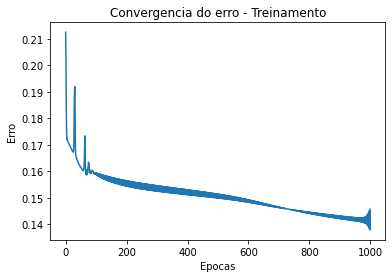

In [43]:
rede.visualizaErro("erro_regressao.png") #Apresenta a convergência do erro

#####**Executando implementação do Regressor MLP do SCIKIT LEARN para COMPARAÇÃO com a NOSSA implementação**

In [44]:
#Referência: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
from sklearn.neural_network import MLPRegressor

inputs = X_norm
targets = y_norm

# Semente para os passos que usam funções pseudo aleatórias
# Isso previne que todas as vezes gere algo diferente
seed = 42

# Tamanho dos datasets
test_size = 0.2 # 20%

# Divisão dos datasets em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, targets, test_size=test_size, random_state=seed)

print("Tamanho dos datasets: Treino = " + str((1-test_size)*100) + ", Teste = " + str(test_size*100))
print("---- X_train = " + str(X_train.shape) + ", X_test = " + str(X_test.shape) + ", y_train = " + str(y_train.shape) + ", y_test = " + str(y_test.shape))

# Fitting
clf = MLPRegressor(random_state=seed, max_iter=300).fit(X_train, y_train)

#Prediction
y_pred = clf.predict(X_test)

score = mean_squared_error(y_test, y_pred)
print("----Erro Quadrático médio: %.6f" % (score))

Tamanho dos datasets: Treino = 80.0, Teste = 20.0
---- X_train = (847, 68), X_test = (212, 68), y_train = (847, 2), y_test = (212, 2)
----Erro Quadrático médio: 0.034248


####**Teste de Final:** usando K-Fold e as variações de parâmetros solicitadas

In [45]:
"""Esta função automatiza a execução do modelo para facilitar o script de variação de parâmetros solicitados no enunciado do Projeto 1"""
def executar_regressor(inputs, targets, k=10, n=3, tx=0.05, ep=1000, m=1.0, nC=1):
  #Armazena os resultados para fazer a média
  scores = []
  
  # Número de divisões (k)
  n_splits = k

  # Inicializando o módulo KFold
  kfold = model_selection.KFold(n_splits=n_splits)

  # Pré-computando o número de divisões
  kfold.get_n_splits(inputs)

  for i, (train_index, test_index) in enumerate(kfold.split(inputs)):
    #print("\nKfold split (%d de %d)" % (i+1, n_splits))

    # Selecionando os dados de acordo com os índices do split
    X_train, X_test = inputs[train_index], inputs[test_index]
    y_train, y_test = targets[train_index], targets[test_index]

    test_size = (len(X_test)/(len(X_train)+len(X_test)))
    #print("Tamanho dos datasets: Treino = " + str(round((1-test_size)*100, 2)) + ", Teste = " + str(round(test_size*100, 2)))
    #print("---- X_train = " + str(X_train.shape) + ", X_test = " + str(X_test.shape) + ", y_train = " + str(y_train.shape) + ", y_test = " + str(y_test.shape))

    # Fitting
    rede = Backpropagation(X_train, y_train, n, tx, ep, m, nC) #parametros(entradas, saidas, neuronios, taxaAprendizagem, epocas, momento, numCamadas)
    rede.inicializaPesos()
    rede.treinamento()

    #Prediction
    y_pred = rede.propaga(X_test)

    score = mean_squared_error(y_test, y_pred)
    #print("----Erro Quadrático médio: %.6f" % (score))
    scores.append(score)

  avg_score = np.mean(scores)
  #print("\nScore médio do regressor: %.2f" % (avg_score))

  print("K-fold: %d, Treino: %.2f, Teste: %.2f, neuronios: %d, taxaAprend: %.2f, epocas: %d, momento: %.2f, camadasOcultas:%d, Erro quadrático médio: %.6f" % (n_splits, (1-test_size)*100, test_size*100, n, tx, ep, m, nC, avg_score))

In [46]:
"""Atribuindo os dados normalizados às variáveis a serem manipuladas pela MLP"""
inputs = X_norm
targets = y_norm

#####**Variando percentual de Treinamento e Teste com K-Fold**

In [47]:
#Definindo os K splits a serem testados
splits = [3, 5, 10]

#Variando o tamanho do conjunto de treinamento e teste usando K-Fold
for k in splits:
  executar_regressor(inputs, targets, k, 3, 0.05, 1000, 1.0, 1)

K-fold: 3, Treino: 66.67, Teste: 33.33, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.036301
K-fold: 5, Treino: 80.08, Teste: 19.92, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.037891
K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.037120


#####**Variando o número de camada escondida**

In [48]:
#Definindo o numero de camadas escondidas
camadas_escondidas = [1, 2]
#Variando o numero de camadas escondidas
for nC in camadas_escondidas:
  executar_regressor(inputs, targets, 10, 3, 0.05, 1000, 1.0, nC)

K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.036634
K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:2, Erro quadrático médio: 0.036766


#####**Variando o número de neurônios na(s) camada(s) escondida(s)**

In [49]:
#Definindo o numero de neuronios na camada escondida
neuronios = [3, 5, 10]
#Variando o numero de neuronios na camada escondida
for n in neuronios:
  executar_regressor(inputs, targets, 10, n, 0.05, 1000, 1.0, 1)

K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.036731
K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 5, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.036031
K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 10, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.035187


#####**Variando a taxa de aprendizagem**

In [50]:
#Definindo a variacao da taxa de aprendizagem
taxaAprendizagem = [0.01, 0.05, 0.1]
#Variando a taxa de aprendizagem
for tx in taxaAprendizagem:
  executar_regressor(inputs, targets, 10, 3, tx, 1000, 1.0, 1)

K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.01, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.036128
K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.037391
K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.10, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.045315


#####**Variando o número de épocas**

In [51]:
#Definindo o numero de epocas
epocas = [200, 500, 1000]
#Variando a quantidade de epocas
for ep in epocas:
  executar_regressor(inputs, targets, 10, 3, 0.05, ep, 1.0, 1)

K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 200, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.038453
K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 500, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.037556
K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.036698


#####**Variando o termo momento**

In [52]:
#Definindo a variação do momento
momentos = [0.25, 0.5, 1.0]
#Variando o momento
for m in momentos:
  executar_regressor(inputs, targets, 10, 3, 0.05, 1000, m, 1)

K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 0.25, camadasOcultas:1, Erro quadrático médio: 0.053927
K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 0.50, camadasOcultas:1, Erro quadrático médio: 0.053071
K-fold: 10, Treino: 90.08, Teste: 9.92, neuronios: 3, taxaAprend: 0.05, epocas: 1000, momento: 1.00, camadasOcultas:1, Erro quadrático médio: 0.037138


#Referências utilizadas:

*   Tutoriais:
        https://www.youtube.com/watch?list=PLQVvvaa0QuDclKx-QpC9wntnURXVJqLyk&

*   Cursos:
        https://www.udemy.com/redes-neurais-artificiais-em-python/learn/v4/content
        https://www.udemy.com/machine-learning-e-data-science-com-python/learn/v4/content

*   Outros Links:
        https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/
        https://www.youtube.com/watch?v=q555kfIFUCM
        http://neupy.com/2015/07/04/visualize_backpropagation_algorithms.html

*   ICMC-USP:
        https://sites.icmc.usp.br/andre/research/neural/index.htm#links

*   Exemplos de Treinamento com o dataset Wine:
        https://www.youtube.com/watch?v=BNjRnlDQqOc&t=182s
        https://www.youtube.com/watch?v=ow3lEgtpqME
        